# Senitiment Analysis for Bike Hire
#### The search query is generated after inputing the query word, language & period in the advanced search option in Twitter. This criteria will now be visible in the search bar, which is copied and pasted in the code as 'query'.

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define the Twitter search query.
query = 'bike hire in london until:2023-02-02 since:2015-01-01'

In [3]:
# Define a list to store the cleaned tweets.
cleaned_tweets = []

In [4]:
# Define the maximum number of tweets to retrieve.
limit = 100000

In [5]:
# Retrieve the tweets.
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    # Break the loop if the maximum number of tweets has been reached.
    if len(cleaned_tweets) == limit:
        break
    else:
        # Clean the text of the tweet.
        cleaned_tweet = re.sub(r'http\S+', '', tweet.rawContent) # remove URLs
        cleaned_tweet = re.sub(r'@[A-Za-z0-9]+', '', cleaned_tweet) # remove mentions
        cleaned_tweet = re.sub(r'#', '', cleaned_tweet) # remove hashtags
        cleaned_tweet = re.sub(r'[^\w\s]', '', cleaned_tweet) # remove special characters
       
    # Append the cleaned tweet to the list of cleaned tweets.
    cleaned_tweets.append(cleaned_tweet)

In [6]:
# Create a Pandas dataframe from the list of cleaned tweets.
df = pd.DataFrame({'Tweet': cleaned_tweets})

In [7]:
# Creating a copy of the dataframe
df_copy = df.copy()

In [8]:
# Select the 'Tweet' column of the dataframe.
df1 = df['Tweet'].values

In [9]:
# To view the entire reivew and summary column.
pd.set_option('display.max_colwidth', None)

In [10]:
# Print the results.
df1

array([' Its a notable event if I see someone in London on a hire bike or scooter using a helmet  Its almost as if theyre not really necessary',
       '   To clarify I wouldnt use an illegal one at all but plenty of hire scooters in London\nI used lime scooters in Berlin a few years ago and enjoyed but wouldnt replace my bike with one',
       ' But I ride my bike most days and the most frequentmost dangerous thing I see other riders do is run reds in London this is usually on hire bikes which seem to me to be likely less experienced riders as evidence by poor skill',
       ...,
       ' Delighted 2have  relisted Cycle hire and bike tours in South West London  Thanks',
       'Delighted 2have  relisted Cycle hire and bike tours in South West London ',
       ' anyone know where i can borrow  hire a bike in edinburgh for 2 weeks until mine moves up from London thanks'],
      dtype=object)

## Using SentimentIntensityAnalyzer

In [11]:
# Import the vader classs and create a object of the analyzer called Darth Vader.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable to store the sia.
sia = SentimentIntensityAnalyzer()

In [12]:
# Define a function to apply the analyzer to each row
def get_sentiment_score(Tweet):
    scores = sia.polarity_scores(Tweet)
    return scores['compound']

In [13]:
# Apply the function to the DataFrame column
df_copy['sentiment_score'] = df_copy['Tweet'].apply(lambda x: get_sentiment_score(x))

In [14]:
# View the results
df_copy.head()

,Tweet,sentiment_score
0,Its a notable event if I see someone in London on a hire bike or scooter using a helmet Its almost as if theyre not really necessary,0.0000
1,To clarify I wouldnt use an illegal one at all but plenty of hire scooters in London\nI used lime scooters in Berlin a few years ago and enjoyed but wouldnt replace my bike with one,0.7515
2,But I ride my bike most days and the most frequentmost dangerous thing I see other riders do is run reds in London this is usually on hire bikes which seem to me to be likely less experienced riders as evidence by poor skill,-0.8663
3,In central London two guys push through tube gates without paying shop lifter in Sainsbury stopped by the security guard then just walks off a guy nicks a hire bike from a tourist in NH Gate at lunchtime Lawlessness No policing Labours fault,0.1363
4,SUBSCRIPTIONBASED BIKE HIRE SCHEMES ON A ROLL\n\nOver the past decade or so weve seen a boom in shortterm bike hire schemes as a way to navigate cities First came docked bike systems such as Londons Santander Cycles or Boris bike scheme\n\n,0.0000


In [15]:
# Get the top 10 positive tweets
df_copy.sort_values('sentiment_score', ascending=0).head(10)

,Tweet,sentiment_score
165,agree great idea that and broadened to be mobility hubs including bike hire car clubs etc I think this relates to the GLA air quality positive policy in London Plan where developments are expected to have a net positive impact on local air quality,0.9586
354,We love this fantastic cycling initiative \n\nBrompton Bike Hire is offering the free hire of Brompton bikes to residents of Merton South London Their goal is to improve the physical and mental health of the community\n\nIs this something that youd like to see in your area,0.9528
713,1 At first theyre going to lose money on it which is great Direct transfer from VC to travellers in London\n2 Maybe theyll provide a service that people are willing to pay for Better bike hire better taxis more flexible tickets better refunds etc Great,0.9432
582,Great transport experience hiring an electricassisted bike in London from an app that lets you pick one up and drop it off just about anywhere Hire by the minute so pedal faster save money Great on a beautiful,0.9378
184,Theyre great Really good for longer distances more inclusive easier transition from people used to cars They have them in London alongside really successful bike hire and the schemes complement each other,0.9378
432,I wish Id asked work for some free cycle hire codes to give away to thank everyone for their thoughts I only expected one or two comments to be honest Maybe the prize is just knowing to dock your bike every 30 minutes if you do ever hire one in London,0.9337
270,Londons high quality cycling infrastructure is popular and well used \n\nIn central London hire bikes make it easy for people to hop onto a bike to complete their journey \n\nGreat cycle lanes easy access to bicycles and youll get lots of people cycling,0.9300
552,Heres a great way to explore London by bike for FREE are offering everyone a day of Santander Cycle hire in Dec use code SCXMAS19 Enjoy your Christmas Cycling Adventures amp jingle those bells,0.9291
763,Likewise Jim \nThats excellent thanks\n\nThe offers there re the bike A good solo 5 mins around Acton Park and youd be set with the steering London Green Cycles also have hire ones in stock in great condition and sell them on,0.9274
643,Just you Neil we are in London for the week its amazing Santander hire bikes a lot more segregation than many others places and an utter joy to travel around by bike 2 to travel all day in London fantastic value,0.9274


In [16]:
# Get the top 10 most negative
df_copy.sort_values('sentiment_score', ascending=1).head(10)

,Tweet,sentiment_score
797,I love the idea of the various bike hire schemes in London but when they just get abandoned on the streets either broken or while the hirer pops into a shop its infuriating _bicycleUK is the worst photos from the last couple of days in Camberwell sortyourshitout,-0.9571
678,Honestly fucking sick of shit bag cyclists giving decent ones like me bad reputation Is their shit behaviour thay creates the hate amp makes cycling dangerous for all Also hire bikes need tourist warnings They have no clue how to cycle in London Bike traffic lights also help,-0.9362
528,But no relief for bike sales slump as there are just far more bikes and electric bikes for hire in London expect more fatalities sadly from bike hirers not wearing helmets than anyone from CoronaVirus lets get real on relative dangers here,-0.9307
91,Sowhere do we start on the cost of living crisis he is creating personallylondon hire bikes for TFL just gone up in price Ulez expansion to all of m25 so thats cars AND Bike users now out of pocket Cressida dick blamed for his own ineptitude Wasted 6 million on TFL art,-0.9100
843,While a law for Death by Dangerous Cycling is pointless waste of time for a stretched government riding a hire bike in London and being involved in a collision is obviously very different circumstances to that happening with your own bike without required brakes,-0.9062
796,I dont need to\n\nI dont care the bike hire schemes in Melbourne amp Seattle failed amp those in London amp New York succeeded\nI dont care that gt 500000 fewer Australians cycle now than in 1985\nI dont care about Australias obesity rates v NL\nI am ignorant racist amp proud,-0.9042
370,_Cycling NHS need to hire security at cycle park but someone is taking in their own hand beating bike thieves up resulting them catching covid at hospital should NHS leave them left 4 dead,-0.8934
441,I dont own a bike or car I rely on public transport Theres no point owning a car in London you cant get anywhere as traffic is so bad I just hire one as needed when leaving the city So bike fascist I dont think so,-0.8902
2,But I ride my bike most days and the most frequentmost dangerous thing I see other riders do is run reds in London this is usually on hire bikes which seem to me to be likely less experienced riders as evidence by poor skill,-0.8663
204,London I saw new bike lanes new road layouts multiple people on ebikes scooter hire stations all in familiar parts of Bloomsbury that used to seem completely lost to choking fuming traffic,-0.8610


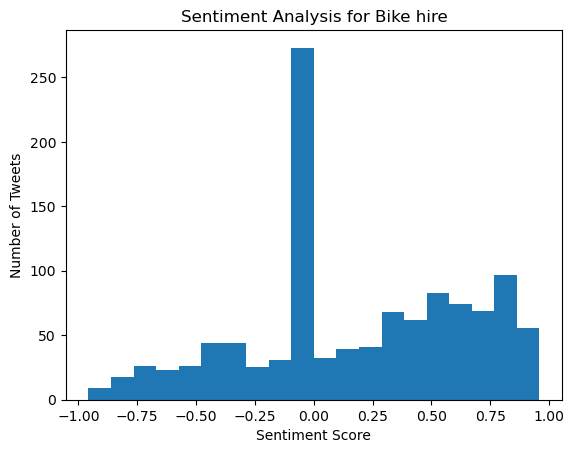

In [17]:
plt.hist(df_copy['sentiment_score'], bins=20)
plt.title('Sentiment Analysis for Bike hire')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')

# Save plot
plt.savefig('bkhire.png')

plt.show()

In [18]:
# Count the number of positive, negative, and neutral tweets
pos_count1 = df_copy[df_copy['sentiment_score'] > 0]['sentiment_score'].count()
neg_count1 = df_copy[df_copy['sentiment_score'] < 0]['sentiment_score'].count()
neu_count1 = df_copy[df_copy['sentiment_score'] == 0]['sentiment_score'].count()

# Calculate the percentage of positive, negative, and neutral tweets
pos_perc1 = (pos_count1 / len(df_copy)) * 100
neg_perc1 = (neg_count1 / len(df_copy)) * 100
neu_perc1 = (neu_count1 / len(df_copy)) * 100

# Print the percentages
print(f"Positive tweets: {pos_perc1:.2f}%")
print(f"Negative tweets: {neg_perc1:.2f}%")
print(f"Neutral tweets: {neu_perc1:.2f}%")

Positive tweets: 54.47%
Negative tweets: 22.72%
Neutral tweets: 22.81%


#### Tokenise and create wordclouds

In [20]:
# Import all the necessary packages.
import nltk 

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import seaborn as sns

# Import Counter.
from collections import Counter

In [21]:
# Creating a copy of the dataframe
df2 = df_copy.copy()

In [22]:
df2.head()

,Tweet,sentiment_score
0,Its a notable event if I see someone in London on a hire bike or scooter using a helmet Its almost as if theyre not really necessary,0.0000
1,To clarify I wouldnt use an illegal one at all but plenty of hire scooters in London\nI used lime scooters in Berlin a few years ago and enjoyed but wouldnt replace my bike with one,0.7515
2,But I ride my bike most days and the most frequentmost dangerous thing I see other riders do is run reds in London this is usually on hire bikes which seem to me to be likely less experienced riders as evidence by poor skill,-0.8663
3,In central London two guys push through tube gates without paying shop lifter in Sainsbury stopped by the security guard then just walks off a guy nicks a hire bike from a tourist in NH Gate at lunchtime Lawlessness No policing Labours fault,0.1363
4,SUBSCRIPTIONBASED BIKE HIRE SCHEMES ON A ROLL\n\nOver the past decade or so weve seen a boom in shortterm bike hire schemes as a way to navigate cities First came docked bike systems such as Londons Santander Cycles or Boris bike scheme\n\n,0.0000


In [23]:
# Apply tokenization to Tweet column
df2['Tweet'] = df2['Tweet'].apply(word_tokenize)

In [24]:
# Combine all tokens from all tweets into a single list
all_tokens2 = [token for tweet in df2['Tweet'] for token in tweet]

In [25]:
# Remove non-alphabetic tokens and convert to lowercase
filtered_tokens2 = [token.lower() for token in all_tokens2 if token.isalpha()]

In [26]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens2 = [token for token in filtered_tokens2 if token not in stop_words]

In [27]:
# Create frequency distribution
fdist_n = FreqDist(filtered_tokens2)

In [28]:
# Display the 30 most common tokens and their frequencies
print(fdist_n.most_common(30))

[('bike', 1289), ('hire', 1216), ('london', 1135), ('cycle', 223), ('scheme', 212), ('bikes', 194), ('amp', 135), ('cycling', 115), ('one', 109), ('santander', 101), ('get', 99), ('like', 96), ('would', 94), ('boris', 91), ('city', 87), ('use', 84), ('free', 78), ('ride', 74), ('around', 70), ('dont', 70), ('car', 69), ('time', 68), ('people', 67), ('need', 66), ('see', 63), ('schemes', 63), ('londons', 62), ('new', 59), ('cycles', 57), ('dockless', 57)]


In [29]:
# Create wordcloud
wordcloud = WordCloud(width=1600, height=900,
                      background_color='white',
                      colormap='plasma',
                      min_font_size=10).generate(' '.join(filtered_tokens2))

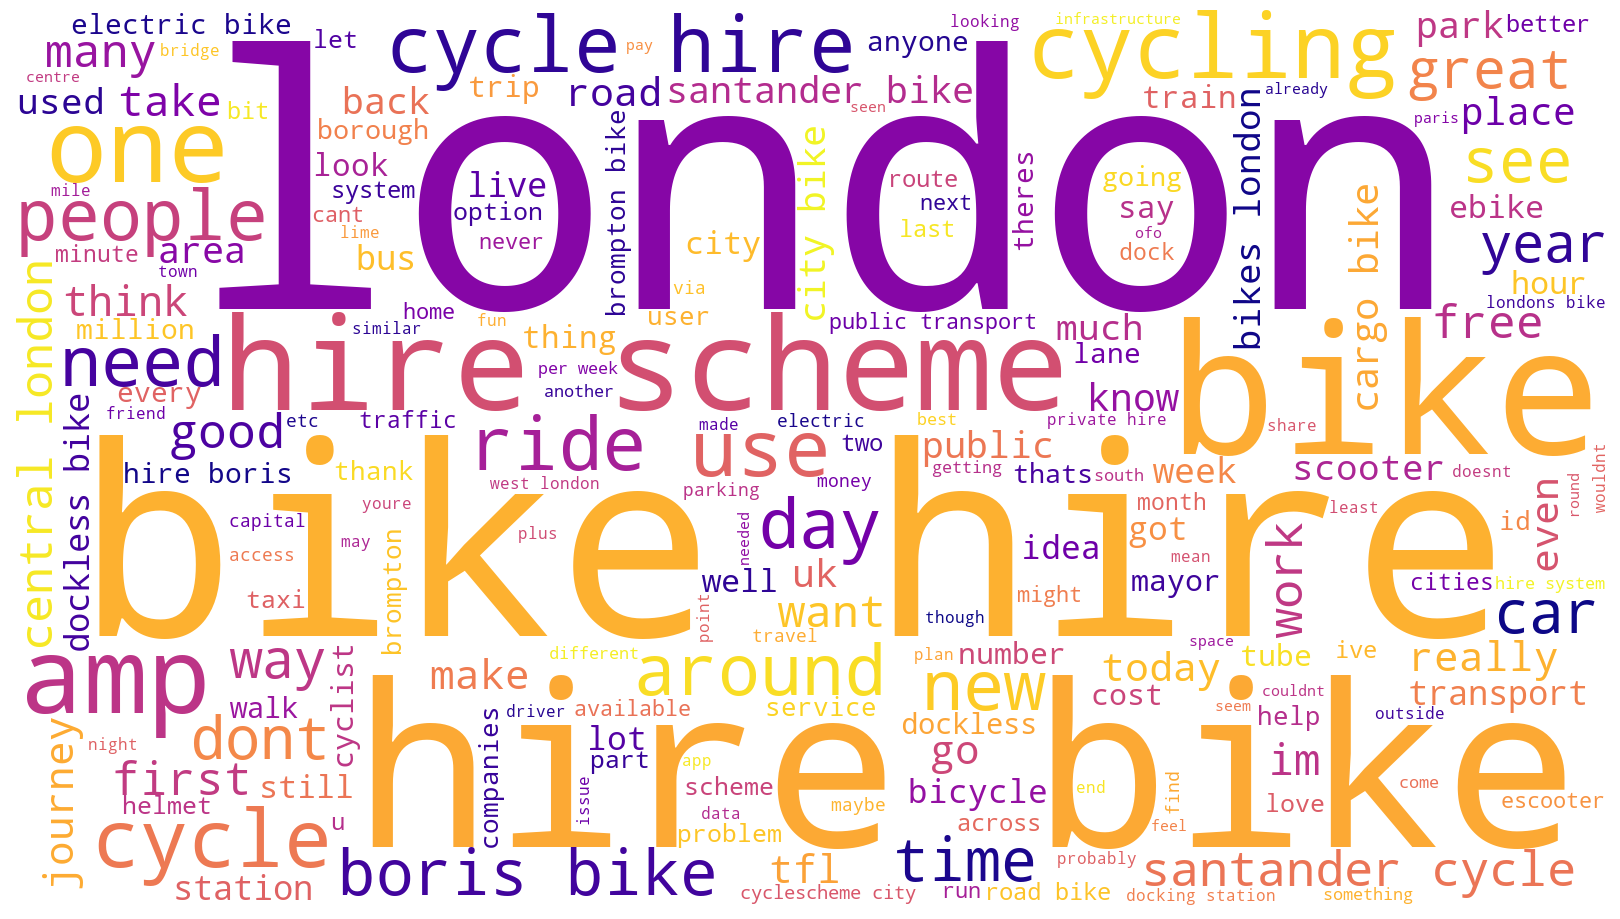

In [30]:
# Display the wordcloud
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('cloud_bike')
plt.show()

In [31]:
# Generate a DataFrame from Counter.
counts2 = pd.DataFrame(Counter(filtered_tokens2).most_common(50),
                          columns=['Word', 'Frequency'])

In [32]:
# Preview data.
counts2

,Word,Frequency
0,bike,1289
1,hire,1216
2,london,1135
3,cycle,223
4,scheme,212
5,bikes,194
6,amp,135
7,cycling,115
8,one,109
9,santander,101


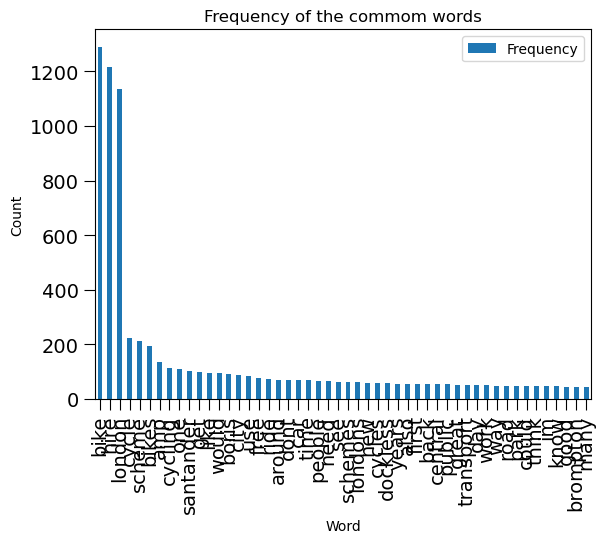

In [33]:
# Create the bar chart
counts2.plot(x='Word', y='Frequency', kind='bar')

# Add a title and labels
plt.title('Frequency of the commom words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.tick_params(axis='both', which='major', labelsize=14, length=8)
plt.savefig('freq_bike_word')
# Show the plot
plt.show()

In [34]:
from textblob import TextBlob

# Define a function to extract a polartiy score.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [35]:
# Populate a new column with polarity scores for 15 most frequent words used in review.
counts2['polarity'] = counts2['Word'].apply(generate_polarity)

In [36]:
#converting the list of strings in the 'Tweet' column to a single string 
df2['Tweet'] = df2['Tweet'].apply(' '.join)

In [37]:
# Define a function to extract a subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

In [38]:
# Populate a new column with subjectivity scores for each tweet.
df2['subjectivity'] = df2['Tweet'].apply(generate_subjectivity)

In [39]:
# Populate a new column with polarity scores for each tweet.
df2['polarity'] = df2['Tweet'].apply(generate_polarity)

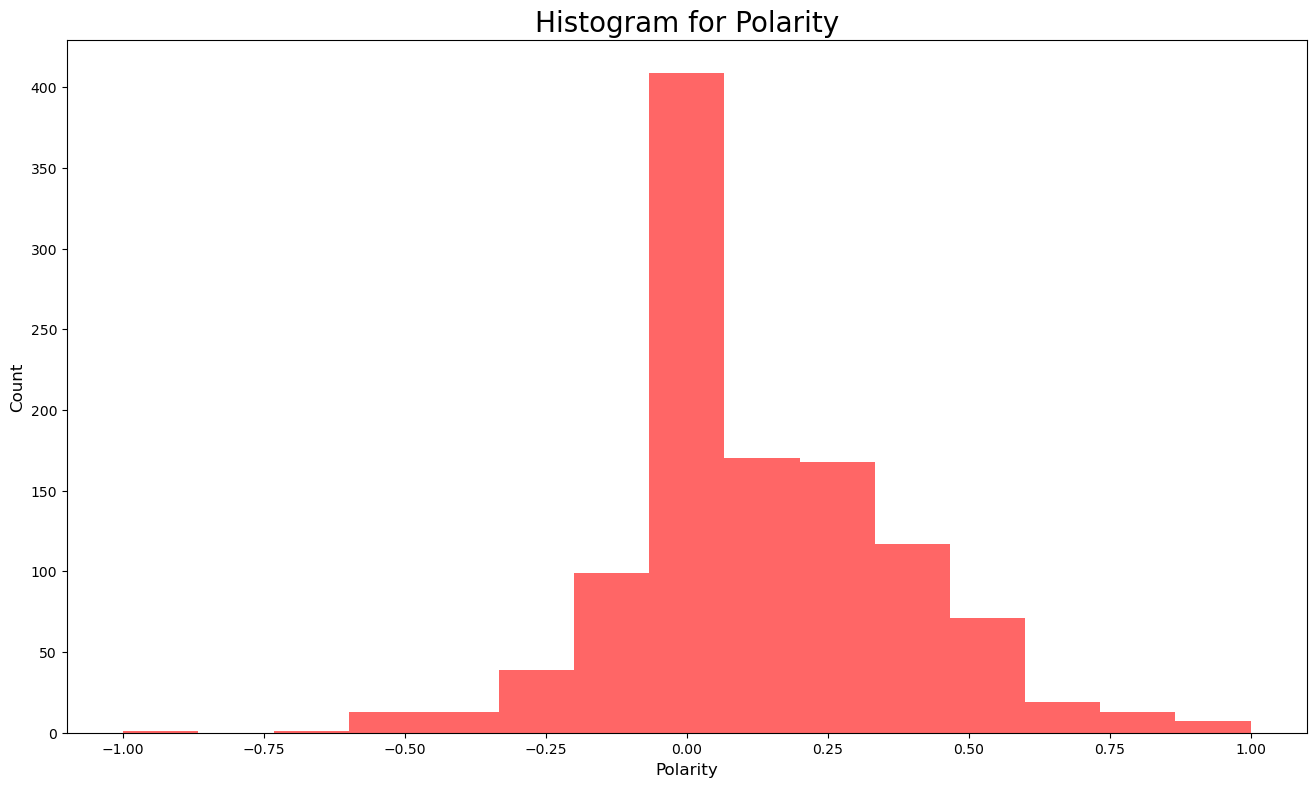

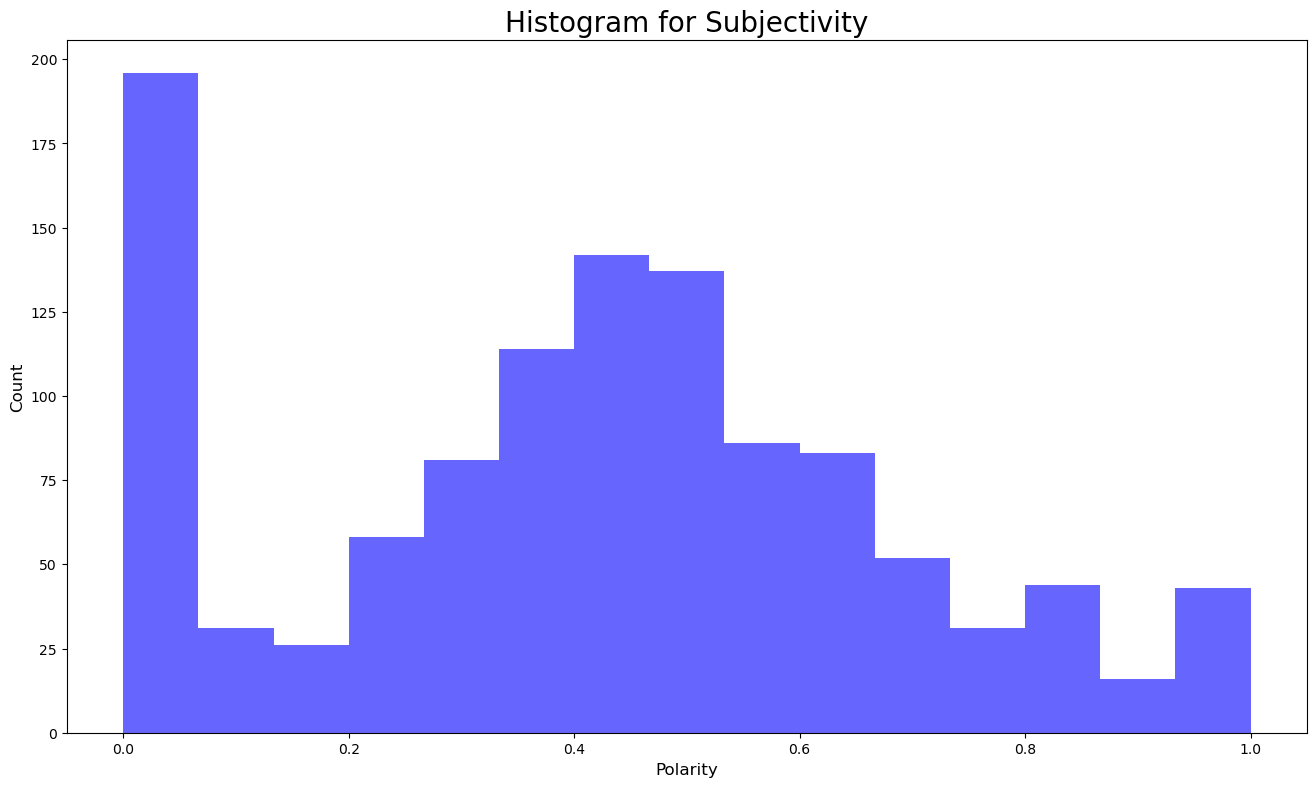

In [40]:
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df2['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram for Polarity', fontsize=20)
plt.savefig('hist_rev22_bike')
# Histogram of subjectivity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df2['subjectivity'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram for Subjectivity', fontsize=20)
plt.savefig('hist_sub22_bike')
plt.show()

In [41]:
df2.head()

,Tweet,sentiment_score,subjectivity,polarity
0,Its a notable event if I see someone in London on a hire bike or scooter using a helmet Its almost as if theyre not really necessary,0.0000,0.750000,0.250000
1,To clarify I wouldnt use an illegal one at all but plenty of hire scooters in London I used lime scooters in Berlin a few years ago and enjoyed but wouldnt replace my bike with one,0.7515,0.433333,-0.066667
2,But I ride my bike most days and the most frequentmost dangerous thing I see other riders do is run reds in London this is usually on hire bikes which seem to me to be likely less experienced riders as evidence by poor skill,-0.8663,0.565741,0.028704
3,In central London two guys push through tube gates without paying shop lifter in Sainsbury stopped by the security guard then just walks off a guy nicks a hire bike from a tourist in NH Gate at lunchtime Lawlessness No policing Labours fault,0.1363,0.250000,0.000000
4,SUBSCRIPTIONBASED BIKE HIRE SCHEMES ON A ROLL Over the past decade or so weve seen a boom in shortterm bike hire schemes as a way to navigate cities First came docked bike systems such as Londons Santander Cycles or Boris bike scheme,0.0000,0.361111,0.000000


In [42]:
# Sort the DataFrame by the 'subjectivity' column in ascending order
df6 = df2.sort_values(by='sentiment_score', ascending=True)

In [43]:
# Select the top negative reviews
top_neg_reviews2 = df6.head(15)

In [44]:
#View the top -ve reviews.
top_neg_reviews2[['Tweet', 'sentiment_score','subjectivity','polarity']].reset_index()

,index,Tweet,sentiment_score,subjectivity,polarity
0,797,I love the idea of the various bike hire schemes in London but when they just get abandoned on the streets either broken or while the hirer pops into a shop its infuriating _bicycleUK is the worst photos from the last couple of days in Camberwell sortyourshitout,-0.9571,0.561111,-0.250000
1,678,Honestly fucking sick of shit bag cyclists giving decent ones like me bad reputation Is their shit behaviour thay creates the hate amp makes cycling dangerous for all Also hire bikes need tourist warnings They have no clue how to cycle in London Bike traffic lights also help,-0.9362,0.798639,-0.435374
2,528,But no relief for bike sales slump as there are just far more bikes and electric bikes for hire in London expect more fatalities sadly from bike hirers not wearing helmets than anyone from CoronaVirus lets get real on relative dangers here,-0.9307,0.600000,0.120000
3,91,Sowhere do we start on the cost of living crisis he is creating personallylondon hire bikes for TFL just gone up in price Ulez expansion to all of m25 so thats cars AND Bike users now out of pocket Cressida dick blamed for his own ineptitude Wasted 6 million on TFL art,-0.9100,0.500000,0.200000
4,843,While a law for Death by Dangerous Cycling is pointless waste of time for a stretched government riding a hire bike in London and being involved in a collision is obviously very different circumstances to that happening with your own bike without required brakes,-0.9062,0.530000,-0.083333
5,796,I dont need to I dont care the bike hire schemes in Melbourne amp Seattle failed amp those in London amp New York succeeded I dont care that gt 500000 fewer Australians cycle now than in 1985 I dont care about Australias obesity rates v NL I am ignorant racist amp proud,-0.9042,0.584848,0.145455
6,370,_Cycling NHS need to hire security at cycle park but someone is taking in their own hand beating bike thieves up resulting them catching covid at hospital should NHS leave them left 4 dead,-0.8934,0.575000,0.250000
7,441,I dont own a bike or car I rely on public transport Theres no point owning a car in London you cant get anywhere as traffic is so bad I just hire one as needed when leaving the city So bike fascist I dont think so,-0.8902,0.577778,-0.033333
8,2,But I ride my bike most days and the most frequentmost dangerous thing I see other riders do is run reds in London this is usually on hire bikes which seem to me to be likely less experienced riders as evidence by poor skill,-0.8663,0.565741,0.028704
9,204,London I saw new bike lanes new road layouts multiple people on ebikes scooter hire stations all in familiar parts of Bloomsbury that used to seem completely lost to choking fuming traffic,-0.8610,0.361818,0.149545
